## Time to get your hands dirty: The HR diagram   (...and the importance of data scaling in machine learning)

This assignment is about stars...

We will work with a star catalogue of 240 stars described by the following information:

- Temperature (in Kelvin)
- Luminosity (L/Lo)
- Radius (R/Ro)
- Absolute magnitude (Mv)

We also have the following data for each star:

- Color (Red/Orange/Yellow/White/Blue)
- Spectral class ('A', 'B', 'F', 'G', 'K', 'M', 'O')
- Star type (Brown dwarf/Red dwarf/White dwarf/Main sequence/Supergiant/Hypergiant)

This dataset has been collected by [Deepraj Baidya](https://github.com/deepraj1729) and was originally published on [Kaggle](https://www.kaggle.com/deepu1109/star-dataset). 

- Apply PCA to the dataset at your disposal (hint: don't use columns with labels, only those with real numbers).
- Project the dataset into the principal components, and do a scatter plot of the first two. 
- This will look terrible. Think about the units!
- Explore what happens if you rescale the data first.

**This is actually a very important lesson in machine learning**: Massaging your data before giving them to an algorithm can make things much much better.

- You can try an linear, affine transformation such that each dimension goes between -1 and 1.
- Or (which is [the usual machine-learning approach](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)) standardize your data such that each dimension has mean=0 and variance=1. 
- Redo your PCA. Should be much much better.
- How much variance is explained by those two components?


### Part 2. [Optional, not examinable] For later: come back to this assignment after lecture 20
- Now run a supervised classification algorithm on this dataset. 
- Can you predict the stellar type? How well? Careful with overfitting of course.
---


# HR diagram

## Data Loading

In [1]:
import urllib.request
import pandas as pd

urllib.request.urlretrieve("https://raw.githubusercontent.com/nshaud/ml_for_astro/main/stars.csv", "stars.csv")
df_stars = pd.read_csv("stars.csv")

In [2]:
df_stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,Brown Dwarf,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Hypergiant,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Hypergiant,Blue,O
237,8829,537493.000000,1423.0000,-10.73,Hypergiant,White,A
238,9235,404940.000000,1112.0000,-11.23,Hypergiant,White,A


In [2]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

le = LabelEncoder()
# Assign unique integers from 0 to 6 to each star type
df_stars['Star type'] = le.fit_transform(df_stars['Star type'])
labels = le.inverse_transform(df_stars['Star type'])

X = np.array(df_stars.drop(["Star color", "Star type", "Spectral Class"], axis=1))

## Principal Component Analysis (PCA) 

PCA is an algorithm to reduce the dimension of a dataset, losing less information as possible.
We can start from the **covariance matricx**:
$$
C = \frac{1}{N-1}X^TX
$$
where $X$ is a $N\times K$ matrix, with $N$ is the number of object and $K$ is the number of feature. 

In general $C$ is not a diagonal matrix, infact it is true only if the basis of the feature space is ortogonal.
But, even if $C$ is un-diagonal, we can always use the **eigen decomposition** to find the eigenvalues and the eigenvectors of the features space. 

Once we have find the basis made of the eigenvectors, $e_j$ of the features space we can write each of the initial coordinates as: 
$$
x_i = \mu_i + \sum_{j=1}^R\theta_{ij}e_j
$$
where $\theta_{ij}$ are the eigevalue.

After that we can classify the eigenvectors based on the eigenvalues ​​and construct a new matrix, $\tilde{C}$, with the first $r<R$ eigenvectors as columns.
$$
\tilde{C} = [e_1, e_2, ..., e_r]
$$
Finally we can project the initial data $X$ in the new space:
$$
\tilde{X} = X^T\tilde{C}
$$
where $\tilde{X}$ is the new data in the reduced space of dimension $r$.

### Eigen decomposition

For a given matrix $A$, we can write the following equation: 
$$
A\vec{v} = \lambda\vec{v} 
$$
where $\vec{v}$ are the **eigenvectors** of $A$ and $\lambda$ are the **eigenvalues**.
From the equation we can also find the following matrix relation: 
$$
A = V\begin{bmatrix}
\lambda_1 & 0 & 0 \\
0 & ... & 0 \\
0 & 0 & \lambda_n
\end{bmatrix}V^{-1}
$$

where the colums of $V$ are the eigenvectors, $\vec{v}_i$.

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_projected = pca.fit_transform(X)

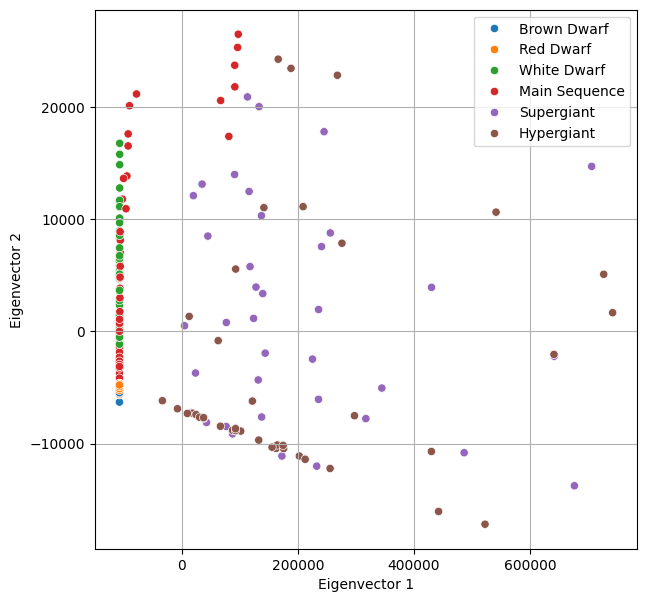

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,7))
sns.scatterplot(x=X_projected[:, 0], y=X_projected[:, 1], hue=labels)
plt.xlabel('Eigenvector 1')
plt.ylabel('Eigenvector 2')
plt.grid(True)
plt.show()

We can see how the first result is quite bad. The reason is that each column of the data represent a different feature and it is on a different scale.

To solve these problem we can use the `StandardScaler` to put all the columns on the same scale.
$$
z_i = \frac{x_i-\mu}{\sigma}
$$

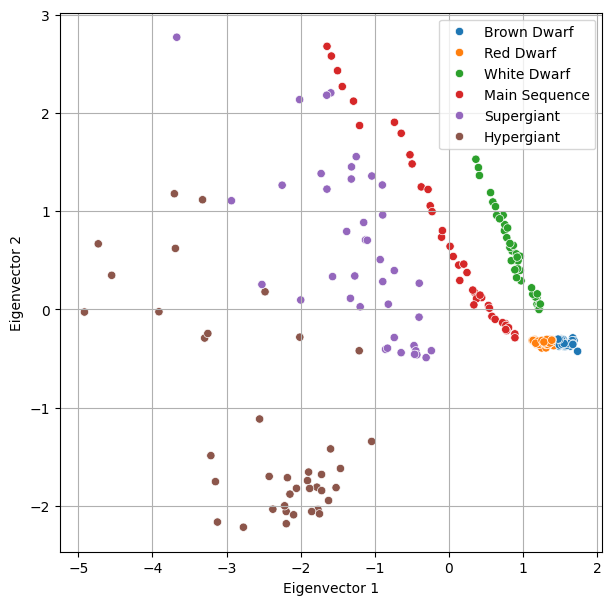

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_scaled_projected = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,7))
sns.scatterplot(x=X_scaled_projected[:, 0], y=X_scaled_projected[:, 1], hue=labels)
plt.xlabel('Eigenvector 1')
plt.ylabel('Eigenvector 2')
plt.grid(True)
plt.show()


The result show a significant improvement.

To understand how much information is described in the reduce dimension data, we can use the **Explained Variance Ratio** that tell us the weight of each eigenvector, based on the corresponding eigenvalue.

The idea is that when we pweform the eigen decomposition we obtain: 
$$
C = V\Lambda V^T \hspace{1cm} \Lambda = \text{diag}(\sigma_i^2)
$$
where $\sigma_i^2$ are the eigenvalues, and the total variance of the system is given by:
$$
\text{Var}(X) = \sum_{i=1}^K \sigma_i^2
$$  

The explained variance ratio is given by:
$$
\text{EVR}_i = \frac{\sigma_i^2}{\text{Var}(X)}
$$  

In [8]:
var = pca.explained_variance_ratio_
print("First eigenvalue explains {:.2f}% of the variance.".format(var[0]*100))
print("Second eigenvalue explains {:.2f}% of the variance.".format(var[1]*100))
print("Total explained variance by the first two eigenvalues: {:.2f}%".format((var[0]+var[1])*100))

First eigenvalue explains 60.36% of the variance.
Second eigenvalue explains 23.50% of the variance.
Total explained variance by the first two eigenvalues: 83.86%


## Classification of the results

Test Accuracy: 0.972


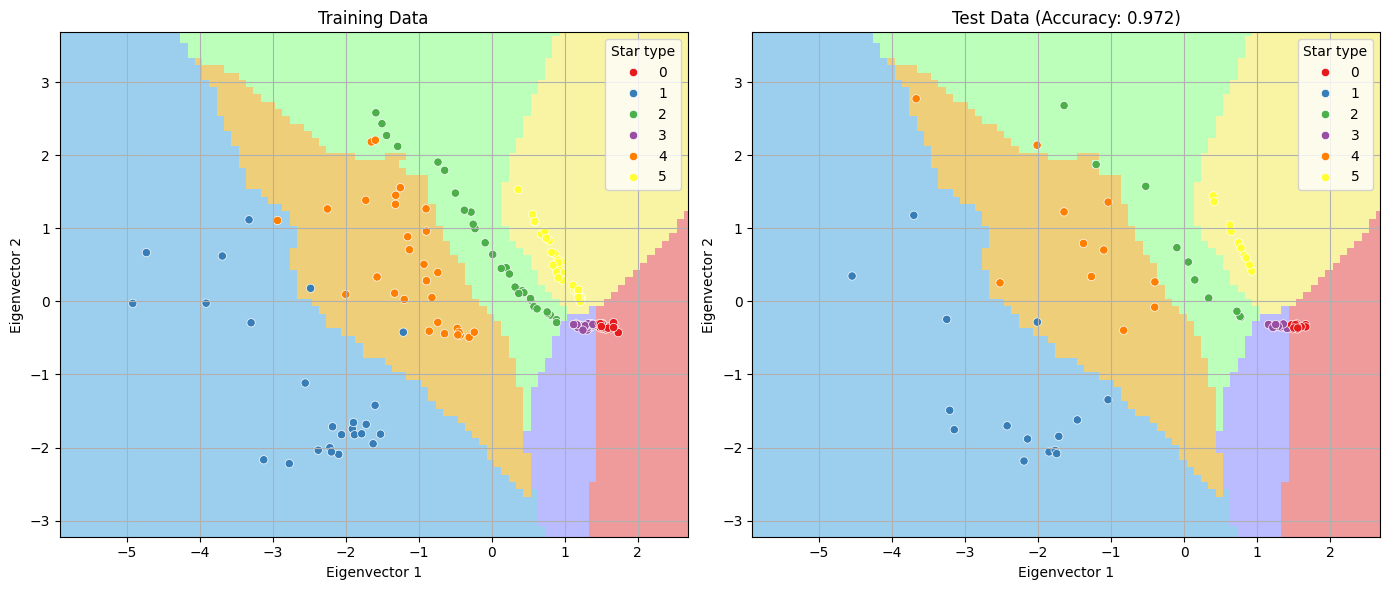

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

X_train, X_test, y_train, y_test = train_test_split(X_scaled_projected, df_stars['Star type'], test_size=0.3, random_state=42)

# Train KNN on the PCA-transformed data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
accuracy = knn.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.3f}")

h = 0.1  # step size in the mesh

cmap_light = ListedColormap(["#EB8282", "#83C4EA", '#EAC257', "#AAFFAA", "#AAAAFF", '#AAFFFF', '#EAC257', "#F7F28D"])

# Create mesh based on the full PCA-transformed data range
x_min, x_max = X_scaled_projected[:, 0].min() - 1, X_scaled_projected[:, 0].max() + 1
y_min, y_max = X_scaled_projected[:, 1].min() - 1, X_scaled_projected[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on the mesh
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(figsize=(14, 6))

# Plot training data
plt.subplot(1, 2, 1)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto', alpha=0.8)
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette='Set1')
plt.xlabel('Eigenvector 1')
plt.ylabel('Eigenvector 2')
plt.title('Training Data')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.grid(True)

# Plot test data
plt.subplot(1, 2, 2)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto', alpha=0.8)
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette='Set1')
plt.xlabel('Eigenvector 1')
plt.ylabel('Eigenvector 2')
plt.title(f'Test Data (Accuracy: {accuracy:.3f})')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.grid(True)

plt.tight_layout()
plt.show()